In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import tensorflow as tf
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


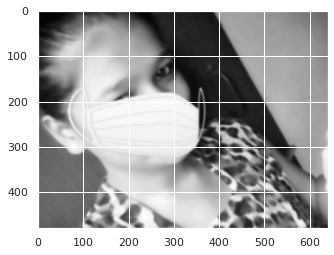

In [3]:
import cv2
dataset = r'/content/gdrive/My Drive/data123'
categories = ['with_mask','without_mask']
for category in categories:
  path = os.path.join(dataset,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break

In [4]:
img_array.shape

(480, 640)

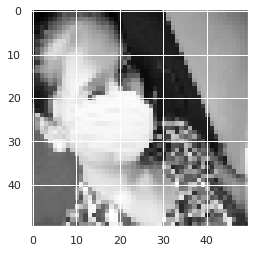

In [5]:
img_size = 50
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
  for category in categories:
    path = os.path.join(dataset,category)
    class_num = categories.index(category)
    try:
      for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array , (img_size , img_size))
        training_data.append([new_array , class_num])
    except Exception as e:
      pass
          
create_training_data()

In [7]:
import random
random.shuffle(training_data)

In [8]:
X=[]
y=[]
for features,label in training_data:
  X.append(features)
  y.append(label)
X  = np.array(X).reshape(-1,img_size,img_size,1)
y = np.array(y)

In [9]:
import pickle
pickle_out = open('X_pickle' , 'wb')
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out = open('y_pickle' , 'wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [10]:
pickle_in = open('X_pickle' , 'rb')
X = pickle.load(pickle_in)
pickle_in = open('y_pickle' , 'rb')
y = pickle.load(pickle_in)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Activation , MaxPooling2D
from tensorflow.keras.layers import Flatten , Dense
X = X/255.0
model = Sequential()
model.add(Conv2D(64,(3,3) , input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3) , input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=20, validation_split=0.1)



Epoch 1/20
45/45 [==============================] - 1s 23ms/step - loss: 0.6137 - accuracy: 0.6486 - val_loss: 0.5034 - val_accuracy: 0.8671
Epoch 2/20
45/45 [==============================] - 1s 13ms/step - loss: 0.3892 - accuracy: 0.8331 - val_loss: 0.2717 - val_accuracy: 0.8671
Epoch 3/20
45/45 [==============================] - 1s 13ms/step - loss: 0.2715 - accuracy: 0.8859 - val_loss: 0.1929 - val_accuracy: 0.9367
Epoch 4/20
45/45 [==============================] - 1s 13ms/step - loss: 0.2172 - accuracy: 0.9134 - val_loss: 0.1699 - val_accuracy: 0.9367
Epoch 5/20
45/45 [==============================] - 1s 12ms/step - loss: 0.1829 - accuracy: 0.9289 - val_loss: 0.2204 - val_accuracy: 0.9051
Epoch 6/20
45/45 [==============================] - 1s 11ms/step - loss: 0.1687 - accuracy: 0.9331 - val_loss: 0.2062 - val_accuracy: 0.8987
Epoch 7/20
45/45 [==============================] - 1s 11ms/step - loss: 0.1664 - accuracy: 0.9268 - val_loss: 0.1542 - val_accuracy: 0.9241
Epoch 8/20
45

In [15]:
model.save('/content/gdrive/My Drive/mask_detection.h5')

In [14]:
import cv2
import tensorflow as tf

categories = ['with_mask','without_mask']


def prepare(filepath):
    IMG_SIZE = 50  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("mask_detection.h5")

prediction = model.predict([prepare(r'/content/gdrive/My Drive/data123/with_mask/1-08.jpg')])
print(prediction)  # will be a list in a list.
print(categories[int(prediction[0][0])])

OSError: ignored